### **Ejercicio**: Estimar $x(t)$ por medio de su serie de Fourier.

$
x(t)=
\begin{cases}
0, & -\tfrac{T}{2}\le t< -d,\\[2mm]
m\,t+B, & -d\le t<0,\\[2mm]
-\,m\,t+B, & 0\le t<d,\\[2mm]
0, & d\le t\le \tfrac{T}{2},
\end{cases}
\qquad m=\frac{B}{d},\qquad \omega_0=\frac{2\pi}{T}.
$

Y con $ 0 < d \le \frac{\Tau}{2} $.

In [1]:
import sympy as sp

# Variable independiente
t = sp.symbols('t', real=True)

# Parámetros
T = 2*sp.pi
d = T/4
B = 1.0

m = B/d

# Definición de x(t)
x_t = sp.Piecewise(
    (0, (t >= -T/2) & (t < -d)),     # x(t) = 0 si -T/2 <= t < -d
    (m*t + B, (t >= -d) & (t < 0)),  # x(t) = mt + B si -d <= t < 0
    (-m*t + B, (t >= 0) & (t < d)),  # x(t) = -mt + B si 0 <= t < d
    (0, (t >= d) & (t <= T/2))       # x(t) = 0 si d <= t <= T/2
)

#### Cálculo de los términos $C_n$

In [2]:
# Índice de armónicos
n = sp.symbols('n', integer=True)

# Frecuencia fundamental
w_0 = 2 * sp.pi / T

$
x(t)\sim\sum_{n=-\infty}^{\infty} C_n\,e^{j n\omega_0 t},
\qquad
C_n=\frac{1}{T}\int_{-T/2}^{T/2}x(t)\,e^{-j n\omega_0 t}\,dt.
$

$
C_0=\frac{1}{T}\!\left(\int_{-d}^{0}(m t+B)\,dt+\int_{0}^{d}(-m t+B)\,dt\right)
=\frac{B d}{T}.
$

In [3]:
C_0 = B * d / T

$
C_n=\frac{1}{T}\!\left(\int_{-d}^{0}(m t+B)e^{-j a t}\,dt+\int_{0}^{d}(-m t+B)e^{-j a t}\,dt\right),
\quad a=n\omega_0\neq 0.
$

Antiderivadas útiles:

$
\int e^{-j a t}\,dt=\frac{j}{a}e^{-j a t},\qquad
\int t\,e^{-j a t}\,dt=\frac{(1+j a t)e^{-j a t}}{a^2}.
$

$
\begin{aligned}
I_1&=\int_{-d}^{0}(m t+B)e^{-j a t}\,dt
=\frac{m}{a^2}\!\left[1-(1-j a d)e^{j a d}\right]
+\frac{B j}{a}\!\left[1-e^{j a d}\right],\\
I_2&=\int_{0}^{d}(-m t+B)e^{-j a t}\,dt
=-\frac{m}{a^2}\!\left[(1+j a d)e^{-j a d}-1\right]
+\frac{B j}{a}\!\left[e^{-j a d}-1\right].
\end{aligned}
$

$
I_1+I_2=\frac{2m}{a^2}\!\left[1-\cos(a d)-a d\sin(a d)\right]+\frac{2B}{a}\sin(a d).
$

$
m=\frac{B}{d}\;\Rightarrow\; I_1+I_2=\frac{2B}{d\,a^2}\left[1-\cos(a d)\right].
$

$
C_n=\frac{1}{T}(I_1+I_2)
=\frac{B T}{2\pi^2 d\,n^2}\!\left(1-\cos\frac{2\pi n d}{T}\right),\quad n\neq 0.
$

In [4]:
C_n = B * T / (2 * sp.pi**2 * d * n**2) * (1 - sp.cos(2 * sp.pi * n * d / T))

**Por lo tanto, la aproximación por 2N+1 armónicos de $x(t)$ será**

$
\hat{x}_N(t)= C_0 + \sum_{n=-N}^{N}C_n\,e^{j n\omega_0 t},\quad n\neq 0
$.

In [5]:
N = 20

x_hat = C_0 + sum(C_n.subs(n, k) * sp.exp(sp.I * k * w_0 * t) for k in range(-N, N+1) if k != 0)

### **Resultados**:

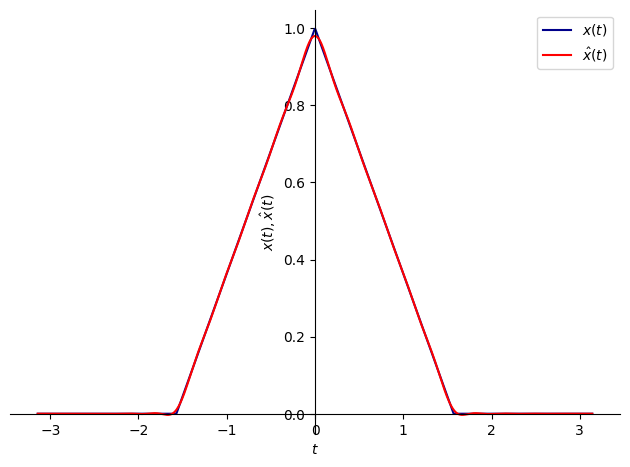

In [6]:
p1 = sp.plotting.plot(x_t, (t, -T/2, T/2), show=False, label='$x(t)$', line_color='darkblue')
p2 = sp.plotting.plot(x_hat, (t, -T/2, T/2), show=False, label='$\\hat{x}(t)$', line_color='red')
p1.append(p2[0])
p1.xlabel = '$t$'
p1.ylabel = '$x(t), \\hat{x}(t)$'
p1.legend = True
p1.show()